In [1]:
import os
import torch
import numpy as np

from torchvision import transforms
from torchvision import models
import torchvision.datasets as dset
import matplotlib.pyplot as plt

from utils.utils import manipulate_net_architecture
from config.config import WEBSITES_DATASET_PATH, MODEL_PATH

In [2]:
# Arguments
batch_size=32
workers=4
cuda=True

# Parameters
num_classes = 4
mean = [0., 0., 0.]
std = [1., 1., 1.]
input_size = 224

# Path to network checkpoint
model_path = os.path.join(MODEL_PATH, "websites_vgg16_111", "checkpoint.pth.tar")
labels = ["Homepage", "Login Page", "Not Found", "Old Looking"]


In [3]:
# Data
valdir = os.path.join(WEBSITES_DATASET_PATH, 'val')

test_transform = transforms.Compose([
        transforms.Resize(input_size),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)])

data_test = dset.ImageFolder(root=valdir, transform=test_transform)

# Dataloader
data_test_loader = torch.utils.data.DataLoader(data_test,
                                            batch_size=batch_size,
                                            shuffle=True,
                                            num_workers=workers,
                                            pin_memory=True)

In [4]:
net = models.vgg16()
net = manipulate_net_architecture(model_arch='vgg16', net=net, num_classes=num_classes)
# Load checkpoint
net.load_state_dict(torch.load(model_path)['state_dict'])
net.eval()
if cuda:
    net.cuda()

In [5]:
data_test_iter=iter(data_test_loader)
img, lbl = next(data_test_iter)
if cuda:
    img, lbl = img.cuda(), lbl.cuda()

out = net(img)
pred = torch.argmax(out, dim=-1)

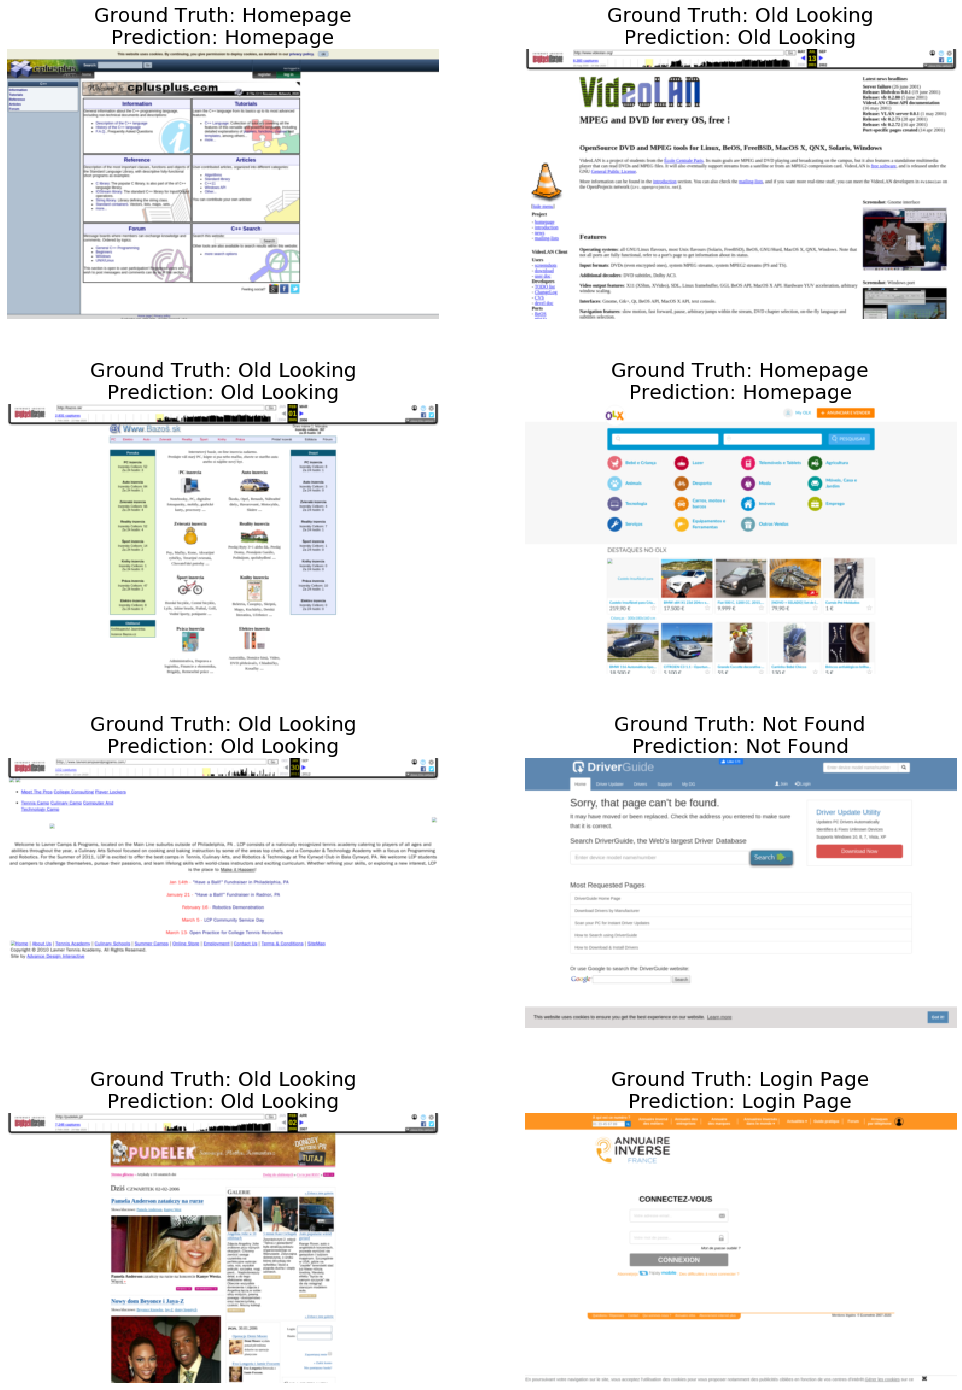

In [6]:
fig = plt.figure(figsize=(17,25))

for i in range(8):
    ax = plt.subplot(4, 2, i+1)
    
    img_plt = np.transpose(img[i].cpu().detach().numpy(), (1,2,0))
    ax.imshow(img_plt)
    ax.axis("off")
    ax.set_title("Ground Truth: {}\nPrediction: {}".format(labels[lbl[i]], labels[pred[i]]), fontsize=20)
